In [19]:
# Recap-
#Day-1 ANN ,
#Activation Function- Sigmoid, relu, Softmax, tanh
#Loss funtion- Regression - MSE,
#Classification- Binary Crossentropy, Categorical cross entropy
#Deep Learning- Keras- Arch, compile , fit, predict
#dropout- Overfitting

In [20]:
# Agenda-
#1. ANN- Keras, CSV File
#2. Deep learning ANN Project
#3. optimizers-
#4. Early stopping, Batch Normalization
#5. Hyparameter tuning-Keras Tuner
#6. Image Classification

In [21]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import os

In [23]:
pwd()

'C:\\Users\\kandanulus\\MyTestlab\\DPL'

In [24]:
os.chdir('C:\\Users\\kandanulus\\MyTestlab\\DPL')

In [25]:
# import the dataset
data=pd.read_csv('loan_data.csv')

In [26]:
data.shape

(9578, 14)

In [27]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [28]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [30]:
# Null values
data.isnull().sum().any()

False

In [31]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [32]:
data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

# Exploratory data analysis of different factors of the dataset.

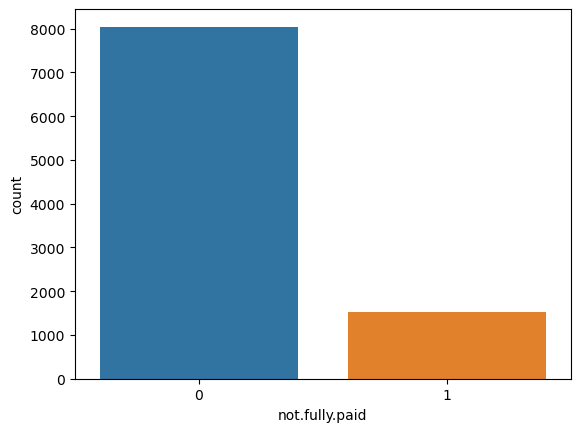

In [34]:
sns.countplot(x=data['not.fully.paid'])
plt.show()

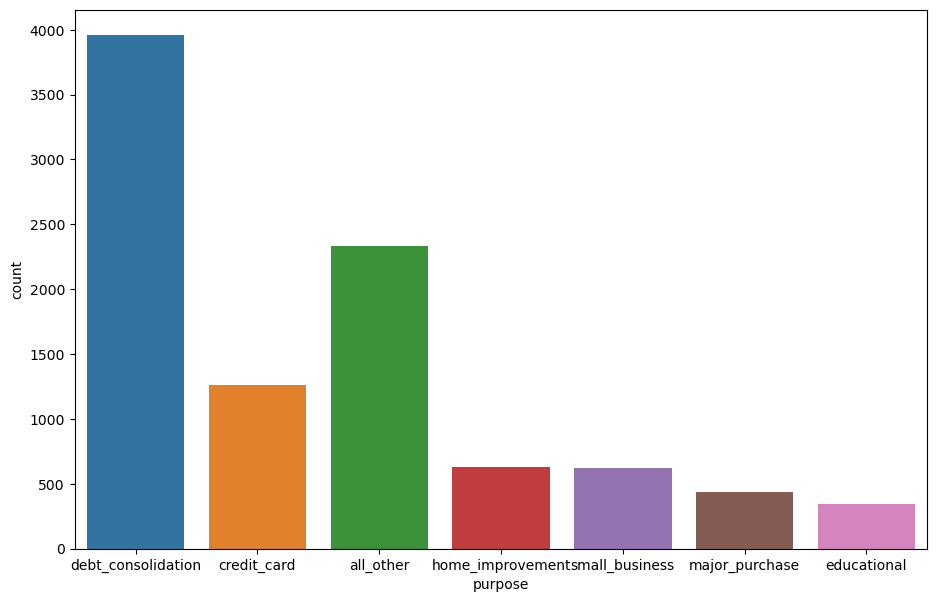

In [35]:
plt.figure(figsize=(11,7))
sns.countplot(x=data['purpose'])
plt.show()

<AxesSubplot:xlabel='purpose', ylabel='count'>

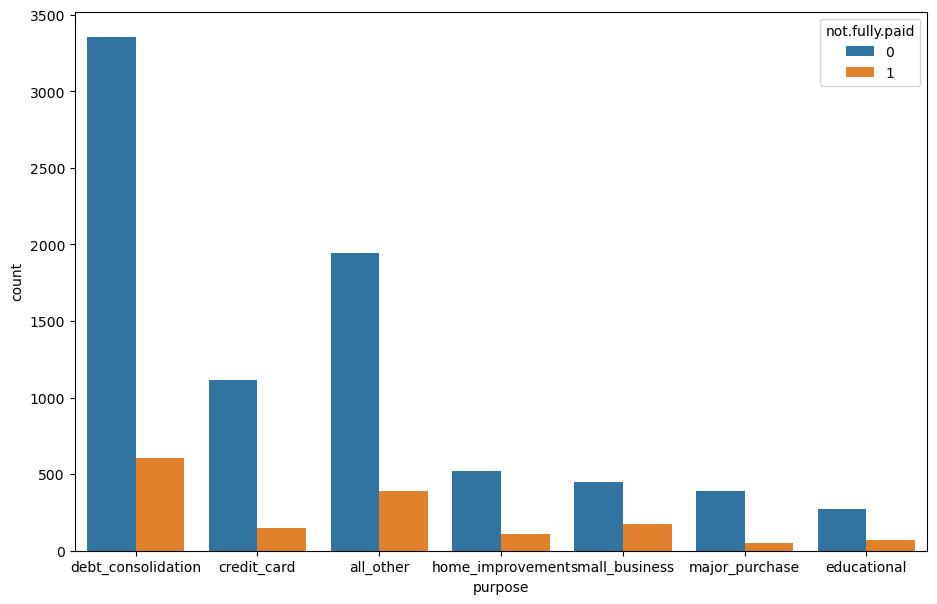

In [36]:
# paid and not paid wrt purpose
plt.figure(figsize=(11,7))
sns.countplot(data=data,x='purpose',hue='not.fully.paid')

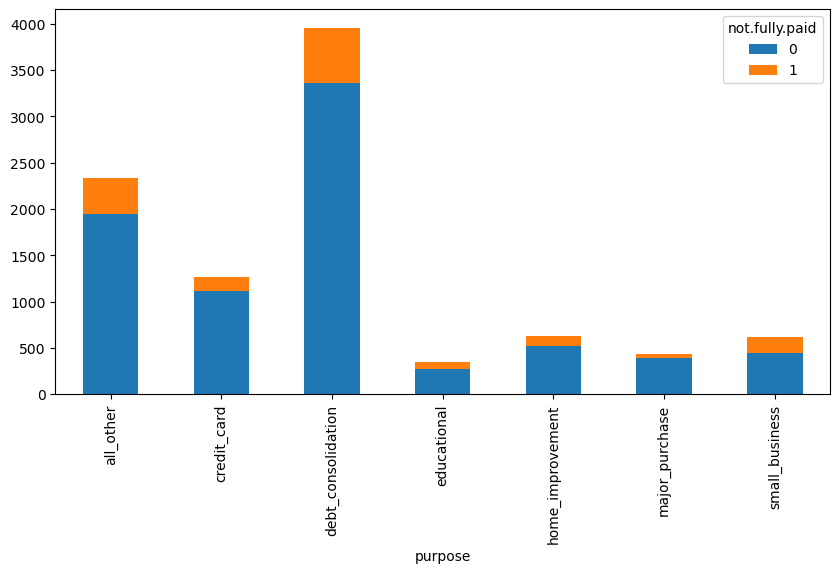

In [37]:
pd.crosstab(data['purpose'],data["not.fully.paid"]).plot(figsize=(10,5),kind='bar',stacked=True)
plt.show()

In [38]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

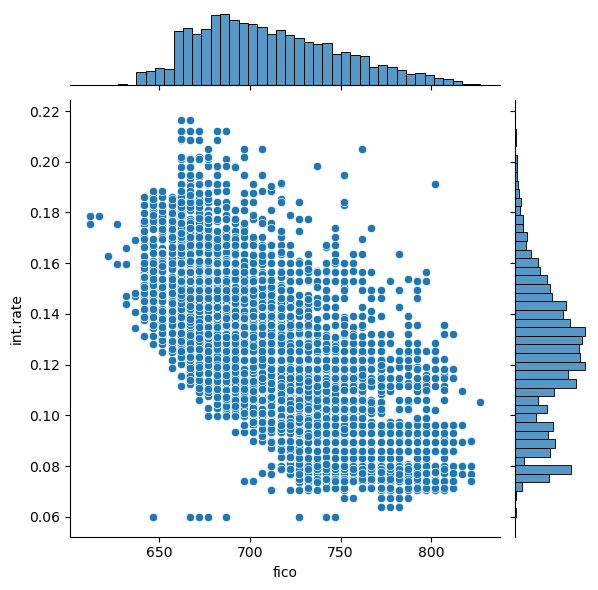

In [39]:
sns.jointplot(x='fico',y='int.rate',data=data)

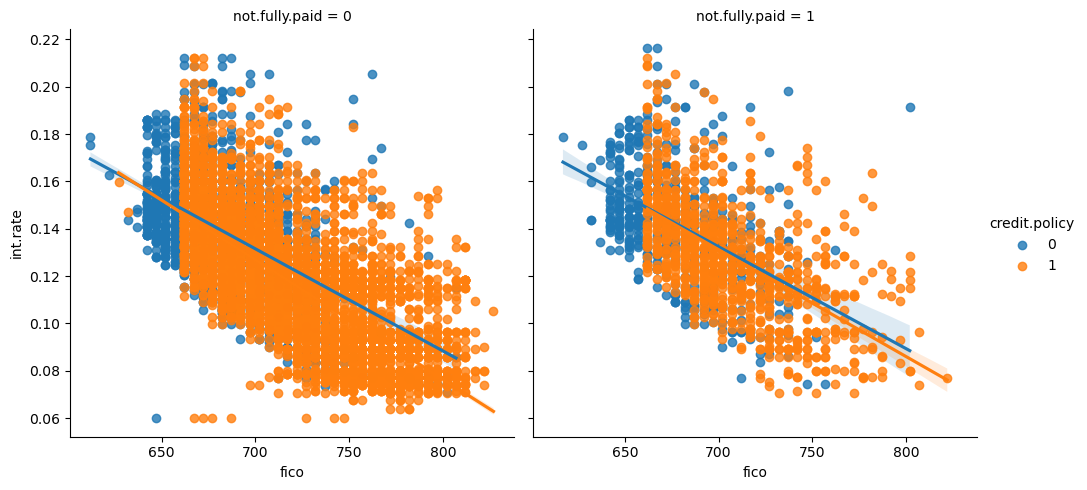

In [40]:
sns.lmplot(x='fico',y='int.rate',data=data,hue='credit.policy',col='not.fully.paid')

In [41]:
# Feature Engineering 
# handle imbalance Dataset


In [42]:
not_fully_paid_0=data[data['not.fully.paid']==0]
not_fully_paid_1=data[data['not.fully.paid']==1]

In [52]:
not_fully_paid_0.shape

(8045, 14)

In [53]:
not_fully_paid_1.shape

(1533, 14)

In [54]:
# resample
from sklearn.utils import resample
df_minor_upsample=resample(not_fully_paid_1,replace=True,n_samples=8045) 
# icecream- 60 --5 ---10 ---5 

In [55]:
new_df=pd.concat([not_fully_paid_0,df_minor_upsample])

In [56]:
from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [57]:
new_df['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

In [58]:
# less 
# 2 ml 8 dl
# 1 ml -
# 

# Feature Transformation 

Transform categorical values into numerical values (discrete)

In [59]:
new_df.dtypes


credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [60]:
new_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
956,1,debt_consolidation,0.1292,252.42,10.985293,18.81,672,3889.000000,12195,58.9,3,0,1,1
2204,1,educational,0.1284,504.27,11.161949,11.42,722,4920.041667,27576,73.7,1,0,0,0
402,1,debt_consolidation,0.1046,649.68,11.657026,16.20,732,5129.000000,23442,42.1,2,0,0,0
8666,0,all_other,0.1387,119.41,11.264464,8.86,647,2910.000000,5376,71.7,8,1,0,1
7914,0,debt_consolidation,0.1186,23.21,10.060491,11.33,657,2879.958333,4479,101.8,1,0,0,1


In [63]:
# Apply label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in new_df.columns:
    if new_df[i].dtypes=='object':
        new_df[i]=le.fit_transform(new_df[i])

In [64]:
new_df.dtypes

credit.policy          int64
purpose                int32
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [65]:
new_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
956,1,2,0.1292,252.42,10.985293,18.81,672,3889.000000,12195,58.9,3,0,1,1
2204,1,3,0.1284,504.27,11.161949,11.42,722,4920.041667,27576,73.7,1,0,0,0
402,1,2,0.1046,649.68,11.657026,16.20,732,5129.000000,23442,42.1,2,0,0,0
8666,0,0,0.1387,119.41,11.264464,8.86,647,2910.000000,5376,71.7,8,1,0,1
7914,0,2,0.1186,23.21,10.060491,11.33,657,2879.958333,4479,101.8,1,0,0,1


Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

newspaper cost, tv cost----total adv cost

<AxesSubplot:>

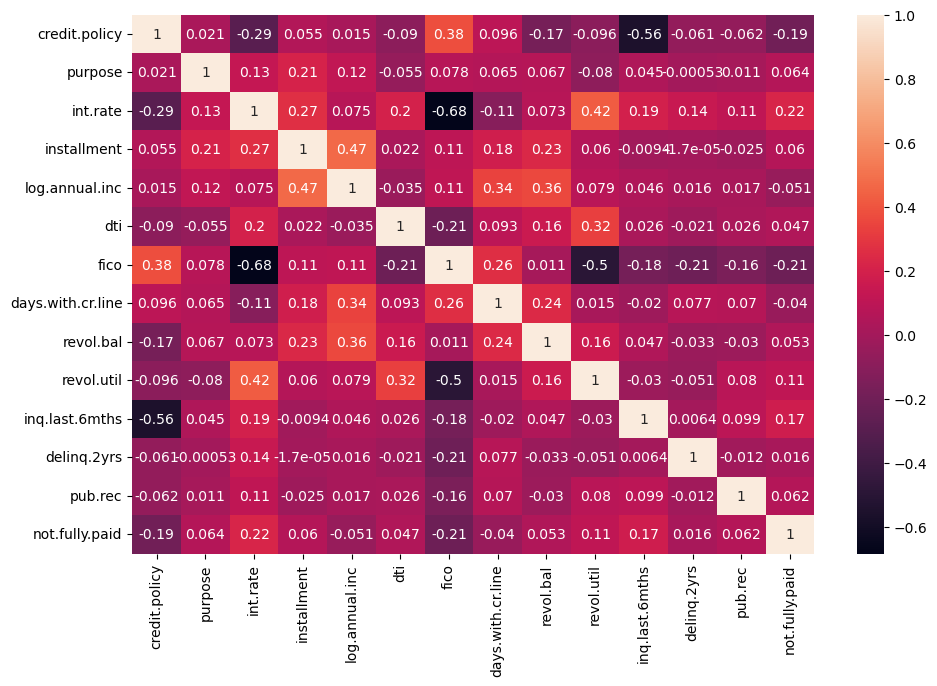

In [66]:
plt.figure(figsize=(11,7))
sns.heatmap(new_df.corr(),annot=True)

In [67]:
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.221480
fico                 0.213478
credit.policy        0.193614
inq.last.6mths       0.172791
revol.util           0.111217
purpose              0.064025
pub.rec              0.062229
installment          0.060201
revol.bal            0.052972
log.annual.inc       0.050816
dti                  0.047431
days.with.cr.line    0.039801
delinq.2yrs          0.015597
Name: not.fully.paid, dtype: float64

In [68]:
X=new_df[['credit.policy', 'purpose', 'int.rate', 'installment','dti', 'fico', 'revol.bal', 'revol.util',
       'inq.last.6mths','pub.rec']]

In [69]:
X.shape

(16090, 10)

In [73]:
y=new_df[['not.fully.paid']]

In [74]:
y.shape

(16090, 1)

In [75]:
# Create train set & test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
# Apply Standard Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train) 
X_test=sc.transform(X_test)

In [77]:
X_train

array([[ 5.78785574e-01, -1.14136988e+00, -1.98710892e+00, ...,
        -1.40327989e+00, -7.72553255e-01, -2.68480875e-01],
       [ 5.78785574e-01, -1.45751494e-02,  6.16518050e-02, ...,
        -3.63577233e-03,  1.32513596e+00, -2.68480875e-01],
       [ 5.78785574e-01, -1.45751494e-02, -1.85547843e-01, ...,
         1.28335406e+00,  4.86060275e-01, -2.68480875e-01],
       ...,
       [-1.72775557e+00,  1.11221959e+00, -8.55983253e-01, ...,
        -1.09945470e+00,  5.52051440e+00, -2.68480875e-01],
       [-1.72775557e+00, -1.45751494e-02,  1.51114065e+00, ...,
         9.82942642e-01,  4.86060275e-01, -2.68480875e-01],
       [-1.72775557e+00, -5.77972517e-01,  8.74414285e-01, ...,
         1.17069978e+00, -3.53015412e-01, -2.68480875e-01]])

# In this part, you will create a deep learning model using Keras with Tensorflow backend

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
# create the architecture
# 2 hidden layer with 19, 10 hidden nodes
model=Sequential()
model.add(Dense(19,activation='relu',input_shape=[10]))
model.add(Dropout(0.3))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.3))
# output layer

model.add(Dense(1,activation='sigmoid'))

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                209       
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 420
Trainable params: 420
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [82]:
import tensorflow

In [83]:
# early stopping-
# model gets overfitting- , losses must decrese
early_stop=EarlyStopping(monitor='val_loss',
    min_delta=0.01,
    patience=10,
    verbose=1
    )

In [84]:
# fit the model
history=model.fit(X_train,y_train,
                 epochs=50,
                 batch_size=256,
                 validation_data=(X_test,y_test))
                 #callbacks=[early_stop])

Epoch 1/50
51/51 [==============================] - 1s 4ms/step - loss: 0.7139 - accuracy: 0.5380 - val_loss: 0.6730 - val_accuracy: 0.5808
Epoch 2/50
51/51 [==============================] - 0s 1ms/step - loss: 0.6846 - accuracy: 0.5665 - val_loss: 0.6640 - val_accuracy: 0.5911
Epoch 3/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5830 - val_loss: 0.6607 - val_accuracy: 0.5966
Epoch 4/50
51/51 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.5891 - val_loss: 0.6579 - val_accuracy: 0.5985
Epoch 5/50
51/51 [==============================] - 0s 1ms/step - loss: 0.6613 - accuracy: 0.5995 - val_loss: 0.6561 - val_accuracy: 0.5994
Epoch 6/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.6001 - val_loss: 0.6546 - val_accuracy: 0.6029
Epoch 7/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.6022 - val_loss: 0.6539 - val_accuracy: 0.6053
Epoch 8/50
51/51 [==

In [85]:
model.predict(X_test)

101/101 [==============================] - 0s 475us/step


array([[0.6545104 ],
       [0.44313812],
       [0.5705404 ],
       ...,
       [0.6337665 ],
       [0.55332875],
       [0.49398592]], dtype=float32)

In [86]:
prediction=(model.predict(X_test)>0.5).astype('int32')

101/101 [==============================] - 0s 486us/step


In [87]:
prediction

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [88]:
score=model.evaluate(X_test,y_test,verbose=0)

In [93]:
score

[0.6464720368385315, 0.6168427467346191]

In [94]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,prediction)

0.6168427594779367

In [95]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60      1627
           1       0.60      0.65      0.63      1591

    accuracy                           0.62      3218
   macro avg       0.62      0.62      0.62      3218
weighted avg       0.62      0.62      0.62      3218



In [96]:
model.save('ANN_model1.h5')

In [98]:
# Create model 2 with different parameters
# Optimizer-
#Constant Learning Rate
#Gradient Descent
#SGD
#Mini-Batch SGD
#SGD with momentum

#Variation in LR
#Adagard
#RMSProp
#Adam

In [99]:
# Model2 
# 3 hidden layers, 124,64,32 , tanh, batch Normalization
from tensorflow.keras.layers import BatchNormalization

In [101]:
model1=Sequential()
# First Hidden layer
model1.add(Dense(128,activation='relu',input_shape=[10]))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

# Second Hidden Layer
model1.add(Dense(64,activation='tanh'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

# Third Hidden Layer
model1.add(Dense(32,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))


# output layer
model1.add(Dense(1,activation='sigmoid'))

In [102]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1408      
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 64)               

In [103]:
model1.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [104]:
# fit the model
history=model1.fit(X_train,y_train,
                 epochs=50,
                 batch_size=256,
                 validation_data=(X_test,y_test))

Epoch 1/50
51/51 [==============================] - 1s 5ms/step - loss: 0.7639 - accuracy: 0.5684 - val_loss: 0.6571 - val_accuracy: 0.6097
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.5860 - val_loss: 0.6517 - val_accuracy: 0.6159
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5905 - val_loss: 0.6462 - val_accuracy: 0.6255
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.6035 - val_loss: 0.6453 - val_accuracy: 0.6274
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.6066 - val_loss: 0.6430 - val_accuracy: 0.6277
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.6064 - val_loss: 0.6436 - val_accuracy: 0.6364
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.6207 - val_loss: 0.6419 - val_accuracy: 0.6346
Epoch 8/50
51/51 [==

In [105]:
score=model1.evaluate(X_test,y_test,verbose=0)
print(score)

[0.6139177680015564, 0.6606587767601013]


In [106]:
# Hyparparameter Tuning

In [107]:
# Keras Tuner- Hyparparameter Tuning

In [108]:
!pip install keras-tuner --upgrade


     -------------------------------------- 167.3/167.3 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.1.3
    Uninstalling keras-tuner-1.1.3:
      Successfully uninstalled keras-tuner-1.1.3


In [109]:
import keras_tuner

In [110]:
def build_model(hp):
  model=Sequential()

  #first hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024,step=16),
                  activation=hp.Choice('activation',['relu','tanh']),input_shape=[10]))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))

  #second hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024,step=16),
                  activation=hp.Choice('activation',['relu','tanh'])))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))

  #Third hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024,step=16),
                  activation=hp.Choice('activation',['relu','tanh'])))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))

    #output layer
  model.add(Dense(1,activation='sigmoid'))

  learning_rate=hp.Float('learning_rate',min_value=0.001,max_value=0.1,step=0.01)

  # compile the model
  model.compile(loss='binary_crossentropy',
                optimizer=tensorflow.keras.optimizers.Adam(learning_rate),
                metrics=['accuracy'])
  return model

In [111]:
import tensorflow

In [112]:
import keras_tuner as kt
build_model(kt.HyperParameters())

In [113]:
rtuner=kt.RandomSearch(hypermodel=build_model,
                       objective='val_accuracy',
                       max_trials=3,
                       executions_per_trial=2,
                       overwrite=True
                       )

In [114]:
rtuner.search(X_train,y_train,epochs=4,validation_data=(X_test,y_test),verbose=1)

Trial 3 Complete [00h 00m 44s]
val_accuracy: 0.5969546437263489

Best val_accuracy So Far: 0.6166873872280121
Total elapsed time: 00h 01m 22s
INFO:tensorflow:Oracle triggered exit


In [115]:
models=rtuner.get_best_models()

In [116]:
models[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 528)               5808      
                                                                 
 batch_normalization (BatchN  (None, 528)              2112      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 528)               0         
                                                                 
 dense_1 (Dense)             (None, 528)               279312    
                                                                 
 batch_normalization_1 (Batc  (None, 528)              2112      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 528)               0